
# Colorful Pizza (Percentiles)

* Author: [slothfulwave612](https://twitter.com/slothfulwave612)

* ``mplsoccer``, ``py_pizza`` module helps one to plot pizza charts in a few lines of code.

* The design idea is inspired by [Tom Worville](https://twitter.com/Worville), [Football Slices](https://twitter.com/FootballSlices) and [Soma Zero FC](https://twitter.com/somazerofc)

* We have re-written [Soumyajit Bose's](https://twitter.com/Soumyaj15209314)  pizza chart code to enable greater customisation.

Here we plot a pizza chart with different colors for each slice.


In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.image as mpimg

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
[ridge_map library](https://github.com/ColCarroll/ridge_map).



In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

## Load Image
Load a cropped image of Frenkie de Jong.



In [8]:
#URL = "https://fbref.com/req/202302030/images/headshots/2c56a792_2022.jpg"
#nc_cropped = Image.open(urlopen(URL))

img1 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/NG.jpg')
img2 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/AS.jpg')
img3 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/HL.jpg')

## Multiple Slice Colors
Here we show an example where the slice colors are set via lists.



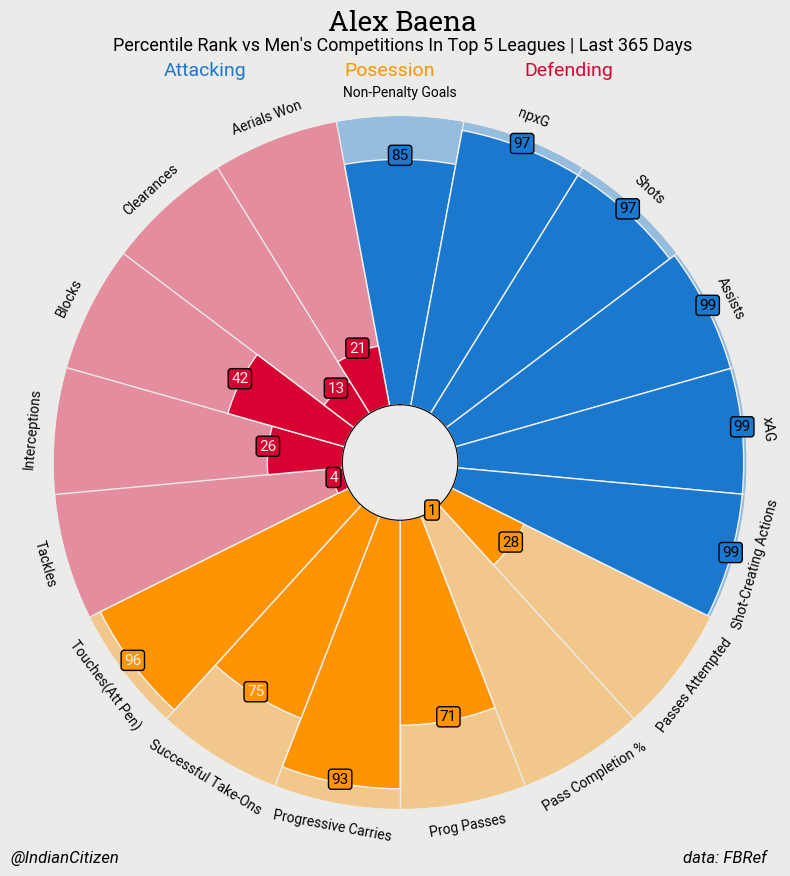

In [3]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "Shots", "Assists", "xAG","Shot-Creating Actions",
          "Passes Attempted","Pass Completion %", "Prog Passes", "Progressive Carries", "Successful Take-Ons","Touches(Att Pen)",
          "Tackles","Interceptions","Blocks","Clearances","Aerials Won"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    85, 97, 97, 99, 99,99,
    28, 1, 71, 93, 75,96,
    4, 26, 42, 13, 21
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 6 + ["#FF9300"] * 6 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 7

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(9, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Alex Baena", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Men's Competitions In Top 5 Leagues | Last 365 Days",
    size=13,
    ha="center", fontproperties=font_normal.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: FBRef"

fig.text(
    0.92, 0.05, f"{CREDIT_1}", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

fig.text(
    0.2, 0.05, f"@IndianCitizen", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.25, 0.925, "Attacking", size=14,
    fontproperties=font_normal.prop, color="#1a78cf"
)

fig.text(
    0.45, 0.925, "Posession", size=14,
    fontproperties=font_normal.prop, color="#ff9300"
)

fig.text(
    0.65, 0.925, "Defending", size=14,
    fontproperties=font_normal.prop, color="#d70232"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/PlayerReports/AB.png',dpi=500,bbox_inches = 'tight',facecolor="#EBEBE9")